In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
sprice= 'Average_sale_price_us_houses.csv'
dfsprice = pd.read_csv(sprice)
describesprice = dfsprice.describe()
print(dfsprice.head())

        DATE  Average Sale price US    Year  Average Sale Price(year)  \
0   1/1/1963                  19300  1963.0                   19375.0   
1   4/1/1963                  19400  1964.0                   20300.0   
2   7/1/1963                  19200  1965.0                   21450.0   
3  10/1/1963                  19600  1966.0                   22925.0   
4   1/1/1964                  19600  1967.0                   24125.0   

   Yearly Change  
0            NaN  
1         0.0456  
2         0.0536  
3         0.0643  
4         0.0497  


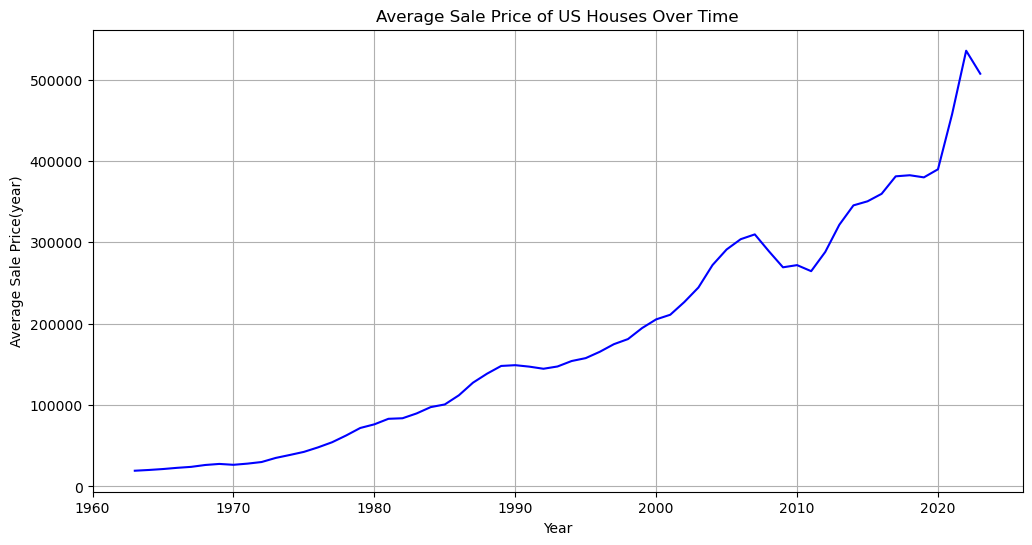

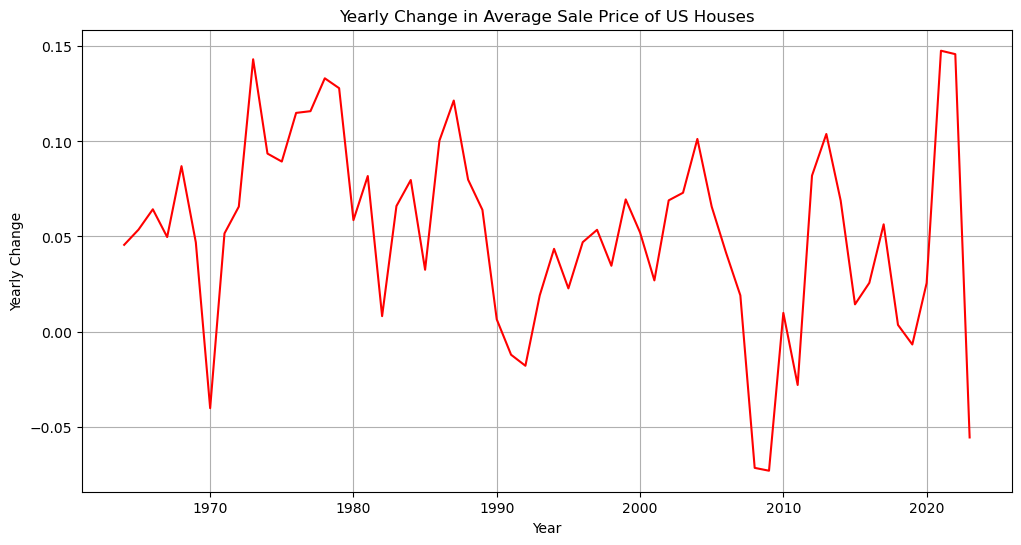

In [3]:
year = dfsprice['Year']
average_sale_price = dfsprice['Average Sale Price(year)']
yearly_change = dfsprice['Yearly Change']
# Create a time series plot for 'Average Sale Price(year)'
plt.figure(figsize=(12, 6))
plt.plot(year, average_sale_price, color='blue')
plt.xlabel('Year')
plt.ylabel('Average Sale Price(year)')
plt.title('Average Sale Price of US Houses Over Time')
plt.grid()
plt.show()

# Create a time series plot for 'Yearly Change'
plt.figure(figsize=(12, 6))
plt.plot(year, yearly_change, color='red')
plt.xlabel('Year')
plt.ylabel('Yearly Change')
plt.title('Yearly Change in Average Sale Price of US Houses')
plt.grid()
plt.show()